<a href="https://colab.research.google.com/github/AbhinayKrPandey/Machine_learning_Projects/blob/main/practical_implementation_of_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install tensorflow


In [11]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
#import some basic libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
dataset=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [42]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
##Divide the dataset into dependent and independent features

In [43]:
X=dataset.iloc[:,3:13]


In [44]:
y=dataset.iloc[:,13]

In [45]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [46]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [47]:
##feature Engineering
geography=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [35]:
##concatenate this with my dataframe

In [49]:
X=X.drop(['Geography','Gender'],axis=1)


KeyError: "['Geography', 'Gender'] not found in axis"

In [50]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [54]:
X=pd.concat([X,geography,gender],axis=1)

In [55]:
X.head(
)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [56]:
##Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
##feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [61]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [63]:
X_train.shape

(8000, 11)

In [104]:
##Part.2 Now we will create ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [105]:
##lets initialise ann
classifier=Sequential()

In [106]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [107]:

classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [108]:

classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [109]:

classifier.add(Dense(units=1,activation='sigmoid'))

In [110]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [112]:
##Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [113]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7871 - loss: 0.5232 - val_accuracy: 0.8046 - val_loss: 0.4290
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7948 - loss: 0.4647 - val_accuracy: 0.8217 - val_loss: 0.4151
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8085 - loss: 0.4376 - val_accuracy: 0.7952 - val_loss: 0.4271
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8082 - loss: 0.4385 - val_accuracy: 0.8133 - val_loss: 0.4028
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8263 - loss: 0.4100 - val_accuracy: 0.8300 - val_loss: 0.3905
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8266 - loss: 0.4039 - val_accuracy: 0.8164 - val_loss: 0.3879
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8236 - loss: 0.4150 - val_accuracy: 0.8410 - val_loss: 0.3775
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8200 - loss: 0.4100 - 

In [114]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

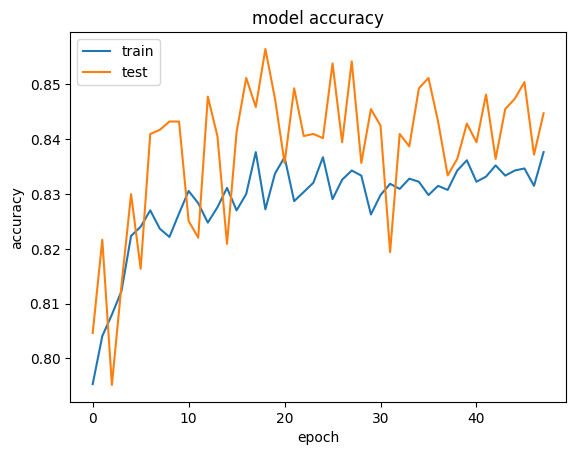

In [115]:
#summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

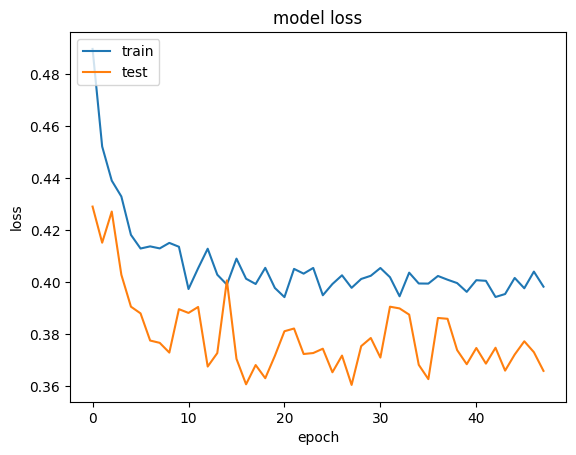

In [116]:
#summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [117]:
##prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [118]:
##making confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1539,   56],
       [ 228,  177]])

In [119]:
##calculate score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [120]:
score

0.858

In [121]:
##get the weights
classifier.get_weights()

[array([[-0.48521656, -0.0323924 , -0.2018459 , -0.4593082 , -0.4287776 ,
          0.40909103, -0.55007005, -0.22680217,  0.40593776,  0.5963831 ,
         -0.08244627],
        [-3.5915287 , -4.008171  ,  1.8108673 ,  0.6100605 ,  1.4769425 ,
         -2.7937164 ,  0.10492007, -3.1462202 , -3.104011  , -1.7689211 ,
          0.25122613],
        [ 0.9258816 , -0.41217425, -0.6235194 ,  0.30574378,  0.1759089 ,
          0.7632731 , -0.15704618,  0.19945136, -0.57183576,  0.79534274,
          0.43040547],
        [-1.5256436 ,  0.1317834 ,  0.4676077 , -2.9122698 , -1.3000154 ,
         -2.4625704 , -2.3930674 , -1.27081   , -1.4973499 , -2.664938  ,
          0.2695298 ],
        [ 0.15966599, -0.29765105, -0.13163966, -3.329979  ,  0.12771884,
          0.23643874, -3.5074177 ,  0.32661918, -0.3576014 ,  0.18157065,
          3.2865062 ],
        [ 0.21642776, -0.47196245, -0.14078546, -0.07809786, -0.3976517 ,
         -1.2650832 , -0.12939343,  0.23250379,  1.0789846 , -1.0291915